# Data Pre Processing
Pre-processing refers to the transformations applied to your data before feeding it to the Machine Learning algorithm, which affects the accuracy of final outcome. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing.Pandas library also offer such capabilities. There are many more options for pre-processing which we’ll explore.

## Anatomy of Data
There are 3 major types of data listed below: 
1. Quantitative (Numbers) eg. sales, prices, age
2. Qualitative (Strings which cannot be grouped) eg. address, names, reviews
3. Categorical (Strings which CAN be grouped) eg. gender, color, sentiment, size
    * Nominal Categorical (Categorical data which has no natural order)  eg. gender, color
    * Ordinal Categorical (Categorical data which HAS natural order) eg. size (S<M<L) 

In [1]:
# Reading data using pandas
import pandas as pd
DiamondPricesData=pd.read_csv('C:/Users/fhashmi/Data Science using Python/Python Datasets/Regression Datasets/DiamondPricesData.csv')

In [2]:
# Data Exploration by printing basic info
# Quantitative variable is either integer or float
# Qualitative/categorical variable is always of object type
DiamondPricesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
price      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53934 non-null object
clarity    53940 non-null object
depth      53926 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
# Data Exploration by looking at some records
DiamondPricesData.head(5)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [4]:
# Data Exploration by printing statistical summary of all columns
DiamondPricesData.describe(include='all')

,price,carat,cut,color,clarity,depth,table,x,y,z
count,53940.000000,53940.000000,53940,53934,53940,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11286,13065,NaN,NaN,NaN,NaN,NaN
mean,3932.799722,0.797940,NaN,NaN,NaN,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,NaN,NaN,NaN,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000


## Dealing with missing data

In [5]:
# Checking and counting for missing data points for each column
# we can see that there are two such columns for which data is missing
DiamondPricesData.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

### Missing data treatment options
1. If there are more than 30% missing values in a column, remove that column from data
2. If n(missing) << n(total rows) then delete rows with missing values 
3. If the datatype is Quantitative:
    * Impute missing values with median/mean value of that column
    * Impute missing values by generating logical value based on other columns/business rules
4. If the datatype is Qualitative
    * Impute the missing values with mode value(most frequently occurring value) of that column
    * Impute missing values by generating logical value based on other columns/business rules

### Deleting missing values

In [6]:
# Delete those rows which contain even 1 missing value, here 20 rows gets deleted
DiamondPricesDataCleaned=DiamondPricesData.dropna()
DiamondPricesDataCleaned.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

### Imputing missing values

In [7]:
# Finding out the mode value for color column
ModeValueForColor=DiamondPricesData['color'].mode()[0]
print('mode value for color column is: ',ModeValueForColor)

mode value for color column is:  G


In [8]:
# Finding out the median value for depth column
MedianValueForDepth=DiamondPricesData['depth'].median()
print('median value for depth column is: ',MedianValueForDepth)

median value for depth column is:  61.8


In [9]:
#Replacing the missing values with MODE value for color column
DiamondPricesData['color'].fillna(ModeValueForColor, inplace=True)

In [10]:
#Replacing the missing values with MEDIAN value for depth column
DiamondPricesData['depth'].fillna(MedianValueForDepth, inplace=True)

In [11]:
# Now we can see all columns have zero missing values
print(DiamondPricesData.isnull().sum())
print(DiamondPricesData.info())

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
price      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


## Handling categorical data in Predictors
Categorial data has two main types
* Nominal - where each data point CANNOT be ordered (like Male, Female)
* Ordinal - where values can be ordered with some sense (like Small < Medium < Large)

In [12]:
# Example data frame to explain the above concept
import pandas as pd
# creating Ordinal column size
# creating nominal column color
# creating class label
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class3']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class3


### Encoding class labels in Target Variable
* For Classification problems, encoding the Target variable into numeric form is ideal (not mandatory) before data is fed to Machine Learning algorithms
* This type of data is neither ordinal nor nominal for the algorithms, it is just a numeric mapping to each class

In [13]:
# Using Pandas factorize method to convert the target variable
factor = pd.factorize(df['classlabel'])
df['classlabel']=factor[0]
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,2


### Mapping ordinal features (Predictor Variables)
* Creating numerical codes for ordinal categorical variables which are meaningful and represent the natural order of data(eg S<M<L can be represented with numeric values as 0<1<2).
* This activity has to be performed using business rules to retain the meaning of data

In [14]:
# Manual mapping definition based on the business interpretation of the data.
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
# encoding the Ordinal values
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,2


### Performing one-hot encoding on nominal features (Predictor Variables)

Categorical variables are intentionally or implicitly encoded as numerical variables by all the Machine Learning algorithms in order to be used as features in any given model.
e.g. [house, car, tooth, car] becomes [0,1,2,1]. 
This imparts an ordinal property to the variable, i.e. house < car < tooth. 
As this is ordinal characteristic and it is usually not desired. One hot encoding is necessary for the proper representation of the distinct elements of the variable.
e.g. [house, car, tooth, car] becomes 
[[1,0,0,0],
[0,1,0,1],
[0,0,1,0]]
so every category in that single column will become one new column having values 0 or 1. Hence there will be 4 new columns with names house, car, tooth and car

### get_dummies() is one the best functions to perform One Hot Encoding in Python!
This will perform below actions
1. Pick only categorical columns from supplied data
2. Convert each one of them in to one hot encoded format
3. Delete the original columns

In [15]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### Class Exercise
Use DiamondPricesData and treat all the categorical variables in it.

Don't look at the answers below!! Try to perform on your own.

In [16]:
# Reading data using pandas
import pandas as pd
DiamondPricesData=pd.read_csv('C:/Users/fhashmi/Data Science using Python/Python Datasets/Regression Datasets/DiamondPricesData.csv')

In [17]:
# Exploring the data
DiamondPricesData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [18]:
# Finding Unique values in ordinal variable cut
DiamondPricesData['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [19]:
# Manual mapping definition based on the business interpretation of the data.
cut_mapping = {'Fair': 1,
                'Good': 2,
                'Very Good': 3,
              'Premium': 4,
               'Ideal': 5,
              }
# encoding the Ordinal variable cut
DiamondPricesData['cut'] = DiamondPricesData['cut'].map(cut_mapping)

# Checking the encoded columns
DiamondPricesData['cut'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [20]:
DiamondPricesData.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,5,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,J,SI2,63.3,58.0,4.34,4.35,2.75


In [21]:
# Converting rest of the nominal categorical variables 'color' and 'clarity'
DiamondPricesDataCleaned=pd.get_dummies(DiamondPricesData)
DiamondPricesDataCleaned.head()

,price,carat,cut,depth,table,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0.23,5,61.5,55.0,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,326,0.21,4,59.8,61.0,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,327,0.23,2,56.9,65.0,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4,62.4,58.0,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,335,0.31,2,63.3,58.0,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0


# Saving python objects as serialized files
* To deploy the predictive models built we save them along with the required data files as serialized file objects
* We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared

In [22]:
import pickle
import os

In [23]:
# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('DiamondPricesDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(DiamondPricesDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: C:\Users\fhashmi\Data Science Using Python


In [24]:
# Reading a Pickle file
with open('DiamondPricesDataCleaned.pkl', 'rb') as fileReadStream:
    DiamondPricesDataFromPickle=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
DiamondPricesDataFromPickle.head()

,price,carat,cut,depth,table,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,326,0.23,5,61.5,55.0,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,326,0.21,4,59.8,61.0,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,327,0.23,2,56.9,65.0,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,334,0.29,4,62.4,58.0,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,335,0.31,2,63.3,58.0,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0


# Bringing features onto the same scale
* While using distance based methods like KNN we must attempt to scale the data, so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like salary has range from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
* This will result in a better prediction model.


## Standardization
The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.


## Normalization i.e. Min-Max scaling

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for confusion!).  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

## Which is better? Standardization or Normalization ?

*"Standardization or Min-Max scaling?"* - There is no obvious answer to this question: it really depends on the application. 

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix).

However, this doesn't mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

#### Let us see the effects of Standardization and Normalization on price and carat column

In [25]:
# The scale of price and carat are very different, we can see that by printing some sample values
DiamondPricesDataCleaned[['price','carat']].head()

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31


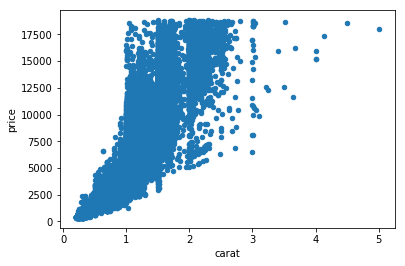

In [26]:
%matplotlib inline
# Using scatter plot to check the relationship between carat and price BEFORE Standardization
DiamondPricesDataCleaned.plot.scatter('carat','price')

### Effect of Standardization

In [27]:
# Statistical summary BEFORE standardization
import numpy as np
print ("Mean of price before standardization: " , round(np.mean(DiamondPricesDataCleaned["price"])))
print ("Mean of carat before standardization: " , round(np.mean(DiamondPricesDataCleaned["carat"])))
print('-' * 60)
print ("std dev of price before standardization: " , round(np.std(DiamondPricesDataCleaned["price"])))
print ("std dev of carat before standardization: " , round(np.std(DiamondPricesDataCleaned["carat"])))

Mean of price before standardization:  3933
Mean of carat before standardization:  1
------------------------------------------------------------
std dev of price before standardization:  3989
std dev of carat before standardization:  0


In [28]:
# Performing standardization for price and carat columns
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
std_scale_fit=std_scaler.fit(DiamondPricesDataCleaned[['price', 'carat']])
StandardizedPriceAndCarat = std_scale_fit.transform(DiamondPricesDataCleaned[['price', 'carat']])

# If you want to change the values of original Data Frame then uncomment below line
#DiamondPricesDataCleaned[['price', 'carat']]=StandardizedPriceAndCarat

# Creating a separate Data Frame just to store new standardized columns
StandardizedPriceAndCaratData=pd.DataFrame(StandardizedPriceAndCarat,columns=['price', 'carat'])
StandardizedPriceAndCaratData.head()

,price,carat
0,-0.904095,-1.198168
1,-0.904095,-1.240361
2,-0.903844,-1.198168
3,-0.902090,-1.071587
4,-0.901839,-1.029394


In [29]:
# Statistical summary AFTER standardization
# Notice that both columns now have mean=0 and standard deviation =1
import numpy as np
print ("Mean of price AFTER standardization: " , round(np.mean(StandardizedPriceAndCaratData["price"])))
print ("Mean of carat AFTER standardization: " , round(np.mean(StandardizedPriceAndCaratData["carat"])))
print('-' * 60)
print ("std dev of price AFTER standardization: " , round(np.std(StandardizedPriceAndCaratData["price"])))
print ("std dev of carat AFTER standardization: " , round(np.std(StandardizedPriceAndCaratData["carat"])))

Mean of price AFTER standardization:  0
Mean of carat AFTER standardization:  0
------------------------------------------------------------
std dev of price AFTER standardization:  1
std dev of carat AFTER standardization:  1


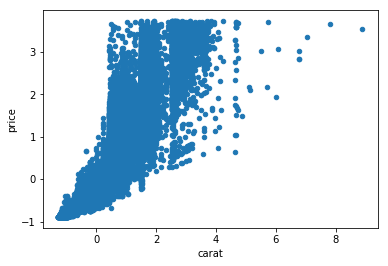

In [30]:
%matplotlib inline
# Using scatter plot to check the relationship between carat and price AFTER Standardization
# Notice that the relationship between these two variables has not changed, 
# Only the data scale has been shifted to satisfy mean=0 and standard deviation =1
StandardizedPriceAndCaratData.plot.scatter('carat','price')

### Effect of Normalization

In [31]:
# Performing Normalization for price and carat columns
from sklearn import preprocessing
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler_fit=minmax_scaler.fit(DiamondPricesDataCleaned[['price', 'carat']])
NormalizedPriceAndCarat = minmax_scaler_fit.transform(DiamondPricesDataCleaned[['price', 'carat']])

# If you want to change the values of original Data Frame then uncomment below line
#DiamondPricesDataCleaned[['price', 'carat']]=NormalizedPriceAndCarat

# Creating a separate Data Frame just to store new standardized columns
NormalizedPriceAndCaratData=pd.DataFrame(NormalizedPriceAndCarat,columns=['price', 'carat'])
NormalizedPriceAndCaratData.head()

,price,carat
0,0.000000,0.006237
1,0.000000,0.002079
2,0.000054,0.006237
3,0.000433,0.018711
4,0.000487,0.022869


In [32]:
# Statistical summary AFTER Normalization
# Notice that both columns now have min value=0 and max value =1
import numpy as np
print ("Min value of price AFTER Normalization: " , round(np.min(NormalizedPriceAndCaratData["price"])))
print ("Min value of carat AFTER Normalization: " , round(np.min(NormalizedPriceAndCaratData["carat"])))

print ("Max value of price AFTER Normalization: " , round(np.max(NormalizedPriceAndCaratData["price"])))
print ("Max value of carat AFTER Normalization: " , round(np.max(NormalizedPriceAndCaratData["carat"])))

Min value of price AFTER Normalization:  0.0
Min value of carat AFTER Normalization:  0.0
Max value of price AFTER Normalization:  1.0
Max value of carat AFTER Normalization:  1.0


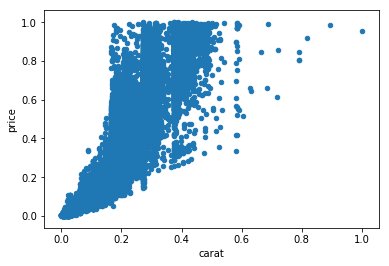

In [33]:
%matplotlib inline
# Using scatter plot to check the relationship between carat and price AFTER Normalization
# Notice that the relationship between these two variables has not changed, 
# Only the data scale has been shifted to satisfy min value=0 and max value =1
NormalizedPriceAndCaratData.plot.scatter('carat','price')